### 1 读取数据

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
import datetime
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:

def statics(data):
    print(data.shape)
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage_of_missing_values',
                                            'Percentage_of_values_in_the_biggest category', 'type'])
    stats_df.sort_values('Percentage_of_missing_values', ascending=False, inplace=True)
    return stats_df

In [3]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/testA.csv')

In [4]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [5]:
statics(train)

(800000, 47)


,Feature,Unique_values,Percentage_of_missing_values,Percentage_of_values_in_the_biggest category,type
43,n11,5,8.719000,91.210250,float64
8,employmentLength,11,5.849875,32.844125,object
40,n8,102,5.033875,5.601000,float64
39,n7,70,5.033750,10.416375,float64
33,n1,33,5.033750,20.376000,float64
34,n2,50,5.033750,14.651375,float64
35,n2.1,50,5.033750,14.651375,float64
37,n5,65,5.033750,9.572000,float64
38,n6,107,5.033750,8.086500,float64
46,n14,31,5.033750,23.437625,float64


In [6]:
test.shape

(200000, 48)

In [7]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n2.2,n2.3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,80000.0,0,2014-07-01,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,Nov-1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,50000.0,0,2015-07-01,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,Jul-2001,5.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,60000.0,2,2016-10-01,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,Aug-2006,0.0,1.0,0.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,37000.0,1,2014-11-01,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,Jul-2002,4.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,80000.0,1,2017-10-01,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,Dec-2000,0.0,1.0,0.0,8.0,11.0,11.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [8]:
train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

In [9]:
train.select_dtypes(include=['object', 'category']).columns.values.tolist()

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [10]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [11]:
data.shape

(1000000, 49)

In [12]:
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n2.2,n2.3
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,1000000.000000,1.000000e+06,1000000.000000,800000.000000,1000000.000000,999999.000000,1000000.000000,999700.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999479.000000,1.000000e+06,999342.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,1000000.0,949619.000000,949619.000000,949619.000000,949619.000000,958367.000000,949619.000000,949619.000000,949619.000000,949618.000000,949619.000000,958367.000000,912673.000000,949619.000000,949619.000000,949619.000000,189889.000000,189889.000000
mean,499999.500000,14420.845925,3.482534,13.239673,438.105739,72091.431605,0.614190,7.619750e+04,1.009832,0.199513,1.745668,258.480425,16.394772,18.285902,0.317770,696.196545,700.196687,11.594484,0.215038,0.134389,1.623413e+04,51.807612,24.983451,0.416892,0.019307,1758.926990,1.0,0.511119,3.643485,5.643547,5.643547,4.735022,8.105145,8.566264,8.281331,14.616502,5.593135,11.640496,0.000818,0.003431,0.089161,2.178948,5.647141,5.647141
std,288675.278933,8720.358533,0.855704,4.765909,261.617903,106647.143239,0.675692,7.077646e+04,0.782519,0.399634,2.367460,199.980363,11.041613,11.219721,0.879524,31.863308,31.863973,5.471342,0.606479,0.378112,2.245257e+04,24.524087,11.988140,0.493045,0.137602,7949.848213,0.0,1.329637,2.249020,3.303965,3.303965,2.951852,4.800121,7.381178,4.559533,8.121567,3.217142,5.480215,0.030164,0.062495,0.508290,1.843899,3.308588,3.308588
min,0.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,625.000000,629.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,8000.000000,3.000000,9.750000,248.480000,427.000000,0.000000,4.567103e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.943000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
50%,499999.500000,12000.000000,3.000000,12.740000,375.380000,7782.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113300e+04,52.200000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000
75%,749999.250000,20000.000000,3.000000,15.990000,580.730000,118112.000000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,394.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.974300e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000,7.000000,7.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,90.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,63.000000,70.000000,132.000000,83.000000,128.000000,45.000000,90.000000,4.000000,4.000000,39.000000,30

## 2 数据处理

In [13]:
numerical_fea = list(data.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data.columns)))
label = 'isDefault'
numerical_fea.remove(label)

In [14]:
# 数值特征
','.join(numerical_fea)

'id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n2.2,n2.3'

In [15]:
# object 特征
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

### 2.1 缺失值填充

In [16]:
data.isnull().sum()

id                         0
loanAmnt                   0
term                       0
interestRate               0
installment                0
grade                      0
subGrade                   0
employmentTitle            1
employmentLength       58541
homeOwnership              0
annualIncome               0
verificationStatus         0
issueDate                  0
isDefault             200000
purpose                    0
postCode                   1
regionCode                 0
dti                      300
delinquency_2years         0
ficoRangeLow               0
ficoRangeHigh              0
openAcc                    0
pubRec                     0
pubRecBankruptcies       521
revolBal                   0
revolUtil                658
totalAcc                   0
initialListStatus          0
applicationType            0
earliesCreditLine          0
title                      1
policyCode                 0
n0                     50381
n1                     50381
n2            

In [17]:
#按照平均数填充数值型特征
data[numerical_fea] = data[numerical_fea].fillna(data[numerical_fea].median())

In [18]:
data[category_fea].mode()

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,B,C1,10+ years,2016-03-01,Aug-2001


In [19]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [20]:
#按照众数填充类别型特征
data[category_fea] = data[category_fea].fillna(data[category_fea].mode())

In [21]:
data['employmentLength']=data['employmentLength'].fillna(data['employmentLength'].mode()[0])

In [22]:
data['employmentLength'].isnull().sum()

0

In [23]:
data.isnull().sum()

id                         0
loanAmnt                   0
term                       0
interestRate               0
installment                0
grade                      0
subGrade                   0
employmentTitle            0
employmentLength           0
homeOwnership              0
annualIncome               0
verificationStatus         0
issueDate                  0
isDefault             200000
purpose                    0
postCode                   0
regionCode                 0
dti                        0
delinquency_2years         0
ficoRangeLow               0
ficoRangeHigh              0
openAcc                    0
pubRec                     0
pubRecBankruptcies         0
revolBal                   0
revolUtil                  0
totalAcc                   0
initialListStatus          0
applicationType            0
earliesCreditLine          0
title                      0
policyCode                 0
n0                         0
n1                         0
n2            

### 2.2 删除列

In [24]:
data['policyCode'].value_counts()

1.0    1000000
Name: policyCode, dtype: int64

In [25]:
# 去除重复列
del train['n2.1']
del test['n2.1'], test['n2.2'], test['n2.3']
# 删除列
del data['policyCode'],data['n2.1'], data['n2.2'], data['n2.3']

In [26]:
data.shape

(1000000, 45)

## 3 特征工程

### 3.1 时间特征提取
- employmentLength：就业年限（年）
- issueDate：贷款发放的月份
- earliesCreditLine：借款人最早报告的信用额度开立的月份


**employmentLength：就业年限（年）**

In [27]:
# employmentLength对象类型特征转换到数值
def employmentLength_to_int(s):
    if s=='10+ years':
        return 10
    elif s=='< 1 year':
        return 0
    elif pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

tqdm.pandas(desc="remove postfix", postfix=None)
data['employmentLength_years']=data['employmentLength'].progress_apply(lambda x:employmentLength_to_int(x))

remove postfix: 100%|██████████| 1000000/1000000 [00:01<00:00, 612488.75it/s]


In [28]:
data['employmentLength_years'].value_counts()

10    387066
2      90565
0      80226
3      80163
1      65671
5      62645
4      59818
6      46582
8      45168
7      44230
9      37866
Name: employmentLength_years, dtype: int64

**issueDate：贷款发放的年月份**

In [29]:
data['issueDate'].value_counts()

2016-03-01    36542
2015-10-01    31918
2015-07-01    30590
2015-12-01    28966
2014-10-01    26768
              ...  
2007-08-01       27
2007-07-01       25
2008-09-01       24
2007-09-01       11
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [30]:
data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
data['issueDate'].min(),data['issueDate'].max()

(Timestamp('2007-06-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [31]:
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')  # 最小日期
#构造时间特征
tqdm.pandas(desc="issueDate_start_lag", postfix=None)
data['issueDate_start_lag'] = data['issueDate'].progress_apply(lambda x: x-startdate).dt.days
data['issueDate_start_lag2year'] = data['issueDate_start_lag']/365

data['issueDate_year'] = data['issueDate'].dt.year
data['issueDate_month'] = data['issueDate'].dt.month
# data['issueDate_hour'] = data['issueDate'].dt.hour
data['issueDate_week'] = data['issueDate'].dt.dayofweek
data['issueDate_day'] = data['issueDate'].dt.day

issueDate_start_lag: 100%|██████████| 1000000/1000000 [00:18<00:00, 54465.45it/s]


In [32]:
## 贷款日期与就业年限的差值
data['issueDate_employmentLength_years_lag']=data['issueDate_year']-data['employmentLength_years']

In [33]:
data['employmentLength_years'].value_counts()

10    387066
2      90565
0      80226
3      80163
1      65671
5      62645
4      59818
6      46582
8      45168
7      44230
9      37866
Name: employmentLength_years, dtype: int64

**earliesCreditLine 借款人最早报告的信用额度开立的月份**

In [34]:
# data['earliesCreditLine'].apply(lambda x:len(x.split('-')))!=2

In [35]:
tqdm.pandas(desc="earliesCreditLine", postfix=None)
month_maps={'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
def ym(x):
    month,year=x.split('-')
    month=month_maps[month]
    return year+'-'+str(month)

data['earliesCreditLine']=data['earliesCreditLine'].progress_apply(lambda x:ym(x))
data['earliesCreditLine'] = pd.to_datetime(data['earliesCreditLine'],format='%Y-%m')
data['earliesCreditLine'].value_counts()


earliesCreditLine: 100%|██████████| 1000000/1000000 [00:01<00:00, 742049.07it/s]


2001-08-01    6957
2002-08-01    6779
2003-09-01    6710
2001-10-01    6636
2004-09-01    6556
              ... 
1950-12-01       1
1960-05-01       1
1946-01-01       1
1955-07-01       1
1953-11-01       1
Name: earliesCreditLine, Length: 726, dtype: int64

In [36]:
data['earliesCreditLine'].min(),data['earliesCreditLine'].max()

(Timestamp('1944-01-01 00:00:00'), Timestamp('2015-10-01 00:00:00'))

In [37]:
data['earliesCreditLine_year'] = data['earliesCreditLine'].dt.year
data['earliesCreditLine_month'] = data['earliesCreditLine'].dt.month

In [38]:
# data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
data['earliesCreditLine_year'].unique()

array([2001, 2002, 2006, 1999, 1977, 1998, 1994, 1993, 1996, 2007, 2014,
       1983, 2011, 1995, 2004, 1976, 2000, 2008, 1997, 2005, 2003, 1987,
       1986, 1992, 1988, 2010, 1974, 1984, 1982, 1970, 1989, 1991, 2009,
       1981, 1973, 1971, 1975, 1990, 2012, 1985, 1966, 1979, 1978, 2013,
       1980, 1972, 1965, 1963, 1969, 1967, 1959, 1968, 1964, 1961, 1962,
       1955, 2015, 1956, 1953, 1957, 1958, 1960, 1952, 1946, 1950, 1951,
       1954, 1944, 1949, 1945])

In [39]:
data['earliesCreditLine_year'].value_counts()

2001    66365
2002    63893
2003    63253
2000    63205
2004    61762
        ...  
1953        6
1946        2
1944        2
1949        1
1945        1
Name: earliesCreditLine_year, Length: 70, dtype: int64

In [40]:
## 贷款日期与就业年限的差值
data['issueDate_earliesCreditLine_daylag']=(data['issueDate']-data['earliesCreditLine']).dt.days # 天数间隔
data['issueDate_earliesCreditLine_yearlag']=(data['issueDate']-data['earliesCreditLine']).dt.days/365 # 年间隔
data['issueDate_earliesCreditLine_yearlag'].value_counts()

12.008219    5943
13.008219    4681
16.010959    4636
12.175342    4270
11.841096    4019
             ... 
50.539726       1
58.120548       1
64.624658       1
52.619178       1
61.213699       1
Name: issueDate_earliesCreditLine_yearlag, Length: 2717, dtype: int64

### 地区编码

In [41]:
data['province']=data['postCode'].apply(lambda x:str(x)[:2])
# data['province'].value_counts().index.tolist()

### 类别特征等级编码

In [42]:
data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [43]:
data['subGrade'].unique()

array(['E2', 'D2', 'D3', 'A4', 'C2', 'A5', 'C3', 'B4', 'B5', 'E5', 'D4',
       'B3', 'B2', 'D1', 'E1', 'C5', 'C1', 'A2', 'A3', 'B1', 'E3', 'F1',
       'C4', 'A1', 'D5', 'F2', 'E4', 'F3', 'G2', 'F5', 'G3', 'G1', 'F4',
       'G4', 'G5'], dtype=object)

In [44]:
tqdm.pandas(desc="subGrade_value", postfix=None)
data['subGrade_value']=data['subGrade'].progress_apply(lambda x:int(x[1]))
data['subGrade_value'].value_counts()

subGrade_value: 100%|██████████| 1000000/1000000 [00:00<00:00, 1015278.91it/s]


1    214283
4    198554
2    197742
5    196024
3    193397
Name: subGrade_value, dtype: int64

In [45]:
for fea in ['subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine','province']:
    lb = LabelEncoder()
    data[fea] = lb.fit_transform(data[fea])

### 长尾分布特征处理

In [46]:
cat_list = [i for i in data.columns if i not in ['id','isDefault','policyCode']]
len(cat_list)

57

In [47]:
for i in tqdm(cat_list):
    if data[i].nunique() > 3:
        data['{}_count'.format(i)] = data.groupby(['{}'.format(i)])['id'].transform('count')

100%|██████████| 57/57 [00:24<00:00,  2.33it/s]


### 分箱特征

量化特征：['loanAmnt','interestRate','installment','annualIncome','dti','ficoRangeLow','ficoRangeHigh','openAcc','revolBal','revolUtil','totalAcc']

In [48]:
amount_feas=['loanAmnt','interestRate','installment','annualIncome','dti',
            'ficoRangeLow','ficoRangeHigh','openAcc','revolBal','revolUtil','totalAcc']
for fea in tqdm(amount_feas):
    # 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/100
    data['{}_bin1'.format(fea)] = np.floor_divide(data[fea], 100)
    ## 通过对数函数映射到指数宽度分箱
    data['{}_bin2'.format(fea)] = np.floor(np.log10(data[fea]))
    # 分位数分箱
    data['{}_bin3'.format(fea)] = pd.qcut(data[fea], 10, labels=False)

100%|██████████| 11/11 [00:01<00:00,  7.52it/s]


### 基本聚合特征

In [49]:
# ===================== amount_feas 基本聚合特征 ===============
for f in tqdm(amount_feas, desc="amount_feas 基本聚合特征"):
    for cate in ['grade','subGrade','employmentTitle','employmentLength','purpose','postCode','regionCode','earliesCreditLine','issueDate', 'issueDate_year', 'issueDate_day']:
#     for cate in cat_list:  # 围绕重要特征issueDate构建聚合特征
    # for cate in ['grade','subGrade','employmentTitle','employmentLength','purpose','postCode','regionCode','earliesCreditLine']:
#     for cate in ['employmentTitle', 'issueDate', 'issueDate_year', 'issueDate_day']:  # 围绕重要特征issueDate构建聚合特征
        if f != cate:
            # data['{}_{}_medi'.format(cate, f)] = data.groupby(cate)[f].transform('median')
            data['{}_{}_mean'.format(cate, f)] = data.groupby(cate)[f].transform('mean')
            # data['{}_{}_max'.format(cate, f)] = data.groupby(cate)[f].transform('max')
            # data['{}_{}_min'.format(cate, f)] = data.groupby(cate)[f].transform('min')
            data['{}_{}_std'.format(cate, f)] = data.groupby(cate)[f].transform('std')

amount_feas 基本聚合特征: 100%|██████████| 11/11 [06:14<00:00, 34.04s/it]


### 基本交叉特征

In [50]:
# =================== amount_feas 基本交叉特征  =============================
for f1 in tqdm(amount_feas, desc="amount_feas 基本交叉特征"):
    for f2 in amount_feas:
        if f1 != f2:
            data['{}_{}_ratio'.format(f1, f2)] = data[f1].values / data[f2].values
            # data['{}_{}_multi'.format(f1, f2)] = data[f1].values * data[f2].values
            # data['{}_{}_add'.format(f1, f2)] = data[f1].values + data[f2].values
            # data['{}_{}_diff'.format(f1, f2)] = data[f1].values - data[f2].values

amount_feas 基本交叉特征: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]


###  特征交互

**其他衍生变量 mean 和 std**

In [51]:
n_feas = ['n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
# 其他衍生变量 mean 和 std
for item in tqdm(n_feas,
                 desc="其他衍生变量 mean 和 std"):
    data['grade_to_mean_' + item] = data['grade'] / data.groupby([item])['grade'].transform('mean')
    data['grade_to_std_' + item] = data['grade'] / data.groupby([item])['grade'].transform('std')

其他衍生变量 mean 和 std: 100%|██████████| 14/14 [01:51<00:00,  7.94s/it]


In [52]:
for f in tqdm(n_feas, desc="n_feas 基本聚合特征"):
    for cate in ['grade', 'subGrade', 'employmentTitle', 'employmentLength', 'purpose', 'postCode', 'regionCode',
                     'earliesCreditLine', 'issueDate', 'issueDate_year', 'issueDate_day']:
        # for cate in ['employmentTitle', 'issueDate', 'issueDate_year', 'issueDate_day']:  # 围绕重要特征issueDate构建聚合特征
        if f != cate:
#             data['{}_{}_medi'.format(cate, f)] = data.groupby(cate)[f].transform('median')
            data['{}_{}_mean'.format(cate, f)] = data.groupby(cate)[f].transform('mean')
#             data['{}_{}_max'.format(cate, f)] = data.groupby(cate)[f].transform('max')
#             data['{}_{}_min'.format(cate, f)] = data.groupby(cate)[f].transform('min')
            data['{}_{}_std'.format(cate, f)] = data.groupby(cate)[f].transform('std')

n_feas 基本聚合特征: 100%|██████████| 14/14 [45:26<00:00, 194.72s/it]


In [53]:
#匿名特征信息提取
data['nmean'] = data[n_feas].mean(1)
data['ntd'] = data[n_feas].std(1)
data['nsum'] = data[n_feas].sum(1)
data['x_cross'] = ''
for i in tqdm(range(0, len(n_feas)), desc="匿名特征信息提取"):
    data['x_cross'] = data['x_cross'].astype(str).values + '_' + data[n_feas[i]].astype(str).values
lbl = LabelEncoder()
data['x_cross'] = lbl.fit_transform(data['x_cross'].astype(str))

匿名特征信息提取: 100%|██████████| 14/14 [00:08<00:00,  1.65it/s]


In [54]:
data['x_cross'].value_counts()

317209    41781
317234      209
309767      204
309768      193
317231      190
          ...  
795431        1
797478        1
799525        1
801572        1
314726        1
Name: x_cross, Length: 881970, dtype: int64

**类别特征nunique特征**

In [55]:
need_list = ['grade', 'subGrade', 'employmentTitle',
                'homeOwnership', 'verificationStatus', 'purpose',
                'postCode', 'regionCode',
                'applicationType', 'initialListStatus', 'title']
nuni_feat =need_list
multi_feat = need_list
for i in tqdm(nuni_feat):
    for j in multi_feat:
        if i != j:
            data['nuni_{0}_{1}'.format(i,j)] = data[i].map(data.groupby(i)[j].nunique())

100%|██████████| 11/11 [03:04<00:00, 16.75s/it]


In [56]:
data.shape

(1000000, 946)

**衍生特征的聚合特征**

In [57]:
cat_list

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'issueDate',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'n0',
 'n1',
 'n2',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'employmentLength_years',
 'issueDate_start_lag',
 'issueDate_start_lag2year',
 'issueDate_year',
 'issueDate_month',
 'issueDate_week',
 'issueDate_day',
 'issueDate_employmentLength_years_lag',
 'earliesCreditLine_year',
 'earliesCreditLine_month',
 'issueDate_earliesCreditLine_daylag',
 'issueDate_earliesCreditLine_yearlag',
 'province',
 'subGrade_value']

In [67]:
# ===================== amount_feas 基本聚合特征 ===============
for f in tqdm(amount_feas, desc="amount_feas 基本聚合特征"):
    for cate in cat_list[-10:]:
#     for cate in cat_list:  # 围绕重要特征issueDate构建聚合特征
    # for cate in ['grade','subGrade','employmentTitle','employmentLength','purpose','postCode','regionCode','earliesCreditLine']:
#     for cate in ['employmentTitle', 'issueDate', 'issueDate_year', 'issueDate_day']:  # 围绕重要特征issueDate构建聚合特征
        if f != cate:
            # data['{}_{}_medi'.format(cate, f)] = data.groupby(cate)[f].transform('median')
            data['{}_{}_mean'.format(cate, f)] = data.groupby(cate)[f].transform('mean')
            # data['{}_{}_max'.format(cate, f)] = data.groupby(cate)[f].transform('max')
            # data['{}_{}_min'.format(cate, f)] = data.groupby(cate)[f].transform('min')
            data['{}_{}_std'.format(cate, f)] = data.groupby(cate)[f].transform('std')

amount_feas 基本聚合特征:   0%|          | 0/11 [08:33<?, ?it/s]


KeyboardInterrupt: 

### 五折转化率特征

In [59]:
# cat_list = ['grade', 'subGrade', 'employmentTitle',
#                 'homeOwnership', 'verificationStatus', 'purpose',
#                 'postCode', 'regionCode',
#                 'applicationType', 'initialListStatus', 'title']

data['ID'] = data.index
data['fold'] = data['ID'] % 5
data.loc[data['isDefault'].isnull(), 'fold'] = 5
target_feat = []
for i in tqdm(cat_list):
    target_feat.extend([i + '_mean_last_1'])
    data[i + '_mean_last_1'] = None
    for fold in range(6):
        data.loc[data['fold'] == fold, i + '_mean_last_1'] = data[data['fold'] == fold][i].map(
            data[(data['fold'] != fold) & (data['fold'] != 5)].groupby(i)['isDefault'].mean()
        )
    data[i + '_mean_last_1'] = data[i + '_mean_last_1'].astype(float)

100%|██████████| 57/57 [1:18:57<00:00, 83.11s/it]


In [69]:
data.shape

(1000000, 1018)

In [70]:
no_fea = ['id', 'policyCode',
              'isDefault', 'ID', 'fold',
              ]
features = [fea for fea in data.columns if fea not in no_fea]
len(features)

1014

In [62]:
## LGB

In [63]:
train_size = len(train)

features = [fea for fea in data.columns if fea not in no_fea]
train = data[:train_size]
test = data[train_size:]


In [64]:
import time
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


分类个数num_classes:2
Fold 1 started at Sun Sep 13 19:32:09 2020
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1.11347, min_child_weight=0.18654 will be ignored. Current value: min_sum_hessian_in_leaf=1.11347
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] lambda_l1 is set=0.55831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.55831
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.67906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.67906
[LightGBM] [Warning] feature_fraction is set=0.38691, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.38691
[LightGBM] [Warning] bagging_fraction is set=0.80718, subsample=0.7 will be ignored. Current value: baggi

[0.8077625, 0.806875, 0.8076875, 0.80779375, 0.808025]
[0.7409335366606817, 0.7391313235414185, 0.7414557685086642, 0.7404762163000378, 0.739491673270701]
CV mean score: 0.7403, std: 0.0009.
CV mean score: 0.8076, std: 0.0004.


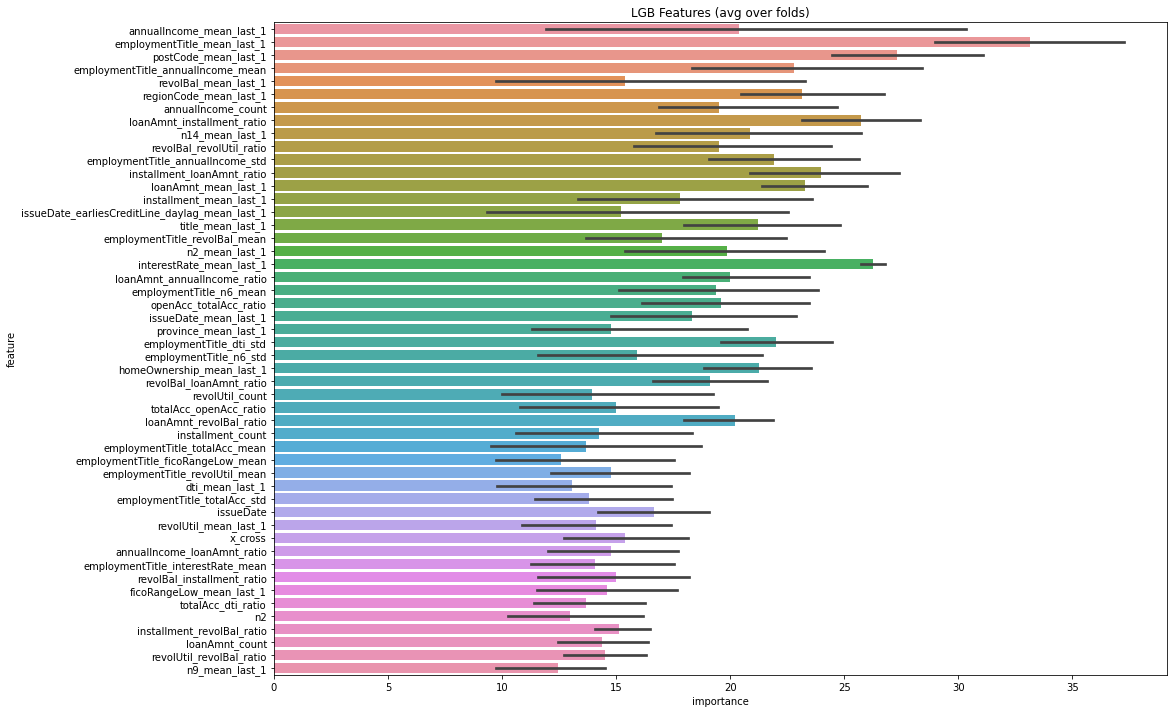

train_model_classification cost time:1667.6759011745453
0.7402977036563005


In [65]:


def train_model_classification(X, X_test, y, params, num_classes=2,
                               folds=None, model_type='lgb',
                               eval_metric='logloss', columns=None,
                               plot_feature_importance=False,
                               model=None, verbose=10000,
                               early_stopping_rounds=200,
                               splits=None, n_folds=3):
    """
    分类模型函数
    返回字典，包括： oof predictions, test predictions, scores and, if necessary, feature importances.
    :params: X - 训练数据， pd.DataFrame
    :params: X_test - 测试数据，pd.DataFrame
    :params: y - 目标
    :params: folds - folds to split data
    :params: model_type - 模型
    :params: eval_metric - 评价指标
    :params: columns - 特征列
    :params: plot_feature_importance - 是否展示特征重要性
    :params: model - sklearn model, works only for "sklearn" model type
    """
    start_time = time.time()
    global y_pred_valid, y_pred

    columns = X.columns if columns is None else columns
    X_test = X_test[columns]
    splits = folds.split(X, y) if splits is None else splits
    n_splits = folds.n_splits if splits is None else n_folds

    # to set up scoring parameters
    metrics_dict = {
        'logloss': {
            'lgb_metric_name': 'logloss',
            'xgb_metric_name': 'mlogloss',
            'catboost_metric_name': 'Logloss',
            'sklearn_scoring_function': metrics.log_loss
        },
        'lb_score_method': {
            'sklearn_scoring_f1': metrics.f1_score,  # 线上评价指标
            'sklearn_scoring_accuracy': metrics.accuracy_score,  # 线上评价指标
            'sklearn_scoring_auc': metrics.roc_auc_score
        },
    }
    result_dict = {}

    # out-of-fold predictions on train data
    oof = np.zeros(shape=(len(X), num_classes))
    # averaged predictions on train data
    prediction = np.zeros(shape=(len(X_test), num_classes))
    # list of scores on folds
    acc_scores=[]
    scores = []
    # feature importance
    feature_importance = pd.DataFrame()

    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(splits):
        if verbose:
            print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params)
            model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_valid, y_valid)],
                      eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                      verbose=verbose,
                      early_stopping_rounds=early_stopping_rounds)

            y_pred_valid = model.predict_proba(X_valid)
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)

        if model_type == 'xgb':
            model = xgb.XGBClassifier(**params)
            model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_valid, y_valid)],
                      eval_metric=metrics_dict[eval_metric]['xgb_metric_name'],
                      verbose=bool(verbose),  # xgb verbose bool
                      early_stopping_rounds=early_stopping_rounds)
            y_pred_valid = model.predict_proba(X_valid)
            y_pred = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict_proba(X_valid)
            score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
            print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
            y_pred = model.predict_proba(X_test)

        if model_type == 'cat':
            model = CatBoostClassifier(iterations=20000, eval_metric=metrics_dict[eval_metric]['catboost_metric_name'],
                                       **params,
                                       loss_function=metrics_dict[eval_metric]['catboost_metric_name'])
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True,
                      verbose=False)

            y_pred_valid = model.predict_proba(X_valid)
            y_pred = model.predict_proba(X_test)

        oof[valid_index] = y_pred_valid
        # 评价指标
        acc_scores.append(
            metrics_dict['lb_score_method']['sklearn_scoring_accuracy'](y_valid, np.argmax(y_pred_valid, axis=1)))
        scores.append(
            metrics_dict['lb_score_method']['sklearn_scoring_auc'](y_valid, y_pred_valid[:,1]))
        print(acc_scores)
        print(scores)
        prediction += y_pred

        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

        if model_type == 'xgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    prediction /= n_splits
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(acc_scores), np.std(acc_scores)))

    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['acc_scores'] = acc_scores
    result_dict['scores'] = scores

    if model_type == 'lgb' or model_type == 'xgb':
        if plot_feature_importance:
            feature_importance["importance"] /= n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12))
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
            plt.title('LGB Features (avg over folds)')
            plt.show()
            result_dict['feature_importance'] = feature_importance
            # print(feature_importance)
    end_time = time.time()

    print("train_model_classification cost time:{}".format(end_time - start_time))
    return result_dict


lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'n_estimators': 100000,
    'learning_rate': 0.1,
    'random_state': 2948,
    'bagging_freq': 8,
    'bagging_fraction': 0.80718,
    # 'bagging_seed': 11,
    'feature_fraction': 0.38691,  # 0.3
    'feature_fraction_seed': 11,
    'max_depth': 9,
    'min_data_in_leaf': 40,
    'min_child_weight': 0.18654,
    "min_split_gain": 0.35079,
    'min_sum_hessian_in_leaf': 1.11347,
    'num_leaves': 29,
    'num_threads': 4,
    "lambda_l1": 0.55831,
    'lambda_l2': 1.67906,
    'cat_smooth': 10.4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_jobs': -1,
    'metric':'auc'
    # 'verbosity': 1,
}

n_fold = 5
num_classes = 2
print("分类个数num_classes:{}".format(num_classes))
folds = StratifiedKFold(n_splits=n_fold, random_state=1314)

X = train[features]
y=train['isDefault']
X_test = test[features]

result_dict_lgb = train_model_classification(X=X,
                                             X_test=X_test,
                                             y=y,
                                             params=lgb_params,
                                             num_classes=num_classes,
                                             folds=folds,
                                             model_type='lgb',
                                             eval_metric='logloss',
                                             plot_feature_importance=True,
                                             verbose=200,
                                             early_stopping_rounds=200)

score = np.mean(result_dict_lgb['scores'])
print(score)
test['isDefault'] = result_dict_lgb['prediction'][:, 1]
test[['id', 'isDefault']].to_csv('result/lgb_{}.csv'.format(score), index=False)


In [66]:
import pickle 
with open('data/data.pickle','wb') as f:
    pickle.dump(data,f)